# Project: Digit Classification with KNN and Naive Bayes

_By Isa Chau for W207: Applied Machine Learning, UC Berkeley School of Information Master of Information and Data Science Program (MIDS), Fall 2019._

**This notebook is based on a project I completed for the MIDS program. In summary, we implement an image recognition system for classifying digits.**

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
from sklearn.datasets import fetch_openml
X, Y = fetch_openml('mnist_784', return_X_y=True , cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

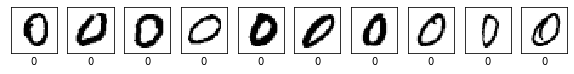

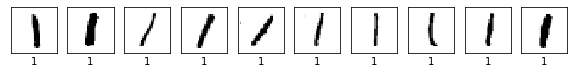

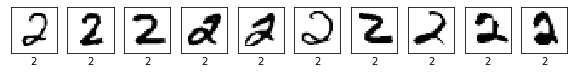

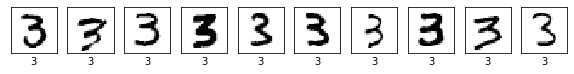

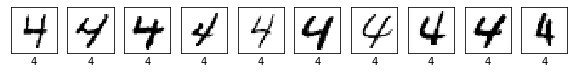

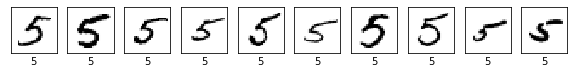

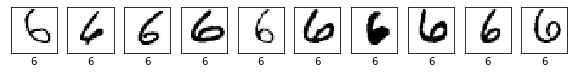

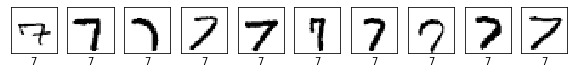

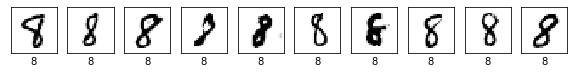

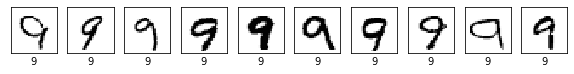

In [3]:
def P1(num_examples):

    #loop from digit 0 to 9
    for k in range(10):
        
        #create plot
        plt.figure(figsize=(10,10)) 
        
        #loop over number of desired examples
        for i in range(num_examples):
            #find index of digits matching our current digit k
            n, = np.where(mini_train_labels == str(k))
            
            plt.subplot(10,num_examples,i+1) #make a subplot for each digit
            plt.xticks([]) #disable x axis ticks.
            plt.yticks([]) #disable y axis ticks.
            plt.grid(False) #disable gridlines.
            #select the image of the first matching digit using index from label training set
            #1D array reshaped into 28x28 grid, colormap change to grayscale
            plt.imshow(np.array(mini_train_data[n[i]]).reshape(28,28), cmap='Greys')
            plt.xlabel(mini_train_labels[n[i]]) #print correct label underneath each sublot
        
        #show plot
        plt.show()
        
P1(10)

### Part 2:

Produce k-Nearest-Neighbors model with k = [1,3,5,7,9].  Evaluate and show the performance of each model. For the 1-Nearest Neighbor model, show precision, recall, and F1 for each label. Which is the most difficult digit?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [4]:
def P2(k_values):

    #loop over list of k_values
    for i in k_values:
        
        #Choose KNN, fit/train model, predict
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(mini_train_data, mini_train_labels)
        predicted_labels = model.predict(dev_data)
        
        #run and store classification report as dictionary
        report = classification_report(predicted_labels, dev_labels, output_dict=True)
        
        #show precision, recall, and F1 for KNN-1 models
        if i == 1:
            #use string.format to and select from stored dictionary
            print('Performance of KNN, k = 1 \nAccuracy: {0}'.format(report['accuracy']))
            print('Label:  Precision:  Recall:  F1 Score: ')
            
            #loop through 10 digits for KNN-1 models
            for n in range(10):
                print("{3:<8}{0:<12.2f}{1:<9.2f}{2:<10.2f}".format(report[str(n)]["precision"], report[str(n)]["recall"], report[str(n)]["f1-score"], n))
            print('\n')    
           
        #all other k_values only print performance/accuracy
        else:
            print('Performance of KNN, k = {0} \nAccuracy: {1} \n'.format(i, report['accuracy']))

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Performance of KNN, k = 1 
Accuracy: 0.884
Label:  Precision:  Recall:  F1 Score: 
0       0.95        0.95     0.95      
1       0.98        0.89     0.93      
2       0.79        0.90     0.84      
3       0.87        0.93     0.90      
4       0.85        0.91     0.88      
5       0.88        0.86     0.87      
6       0.92        0.92     0.92      
7       0.94        0.85     0.89      
8       0.77        0.83     0.80      
9       0.86        0.80     0.83      


Performance of KNN, k = 3 
Accuracy: 0.876 

Performance of KNN, k = 5 
Accuracy: 0.882 

Performance of KNN, k = 7 
Accuracy: 0.877 

Performance of KNN, k = 9 
Accuracy: 0.875 



ANSWER: 8 is the most difficult digit.



### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on the train set.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [5]:
def P3(train_sizes, accuracies):

    #loop over given training set sizes
    for n in train_sizes:
        
        #select, train, predict with KNN for each training set size
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(train_data[:n], train_labels[:n])
        predicted_labels = model.predict(dev_data)
        
        #store classification report as dictionary
        report = classification_report(predicted_labels, dev_labels, output_dict=True)
        
        #store accuracy value for each training set size
        accuracies.append(report['accuracy'])
        
        #nicely print accuracy using string.format
        print('Performance of KNN, k = 1, with {0} training data points \nAccuracy: {1} \n'.format(n,report['accuracy']))

        
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

Performance of KNN, k = 1, with 100 training data points 
Accuracy: 0.702 

Performance of KNN, k = 1, with 200 training data points 
Accuracy: 0.791 

Performance of KNN, k = 1, with 400 training data points 
Accuracy: 0.811 

Performance of KNN, k = 1, with 800 training data points 
Accuracy: 0.866 

Performance of KNN, k = 1, with 1600 training data points 
Accuracy: 0.905 

Performance of KNN, k = 1, with 3200 training data points 
Accuracy: 0.927 

Performance of KNN, k = 1, with 6400 training data points 
Accuracy: 0.939 

Performance of KNN, k = 1, with 12800 training data points 
Accuracy: 0.952 

Performance of KNN, k = 1, with 25600 training data points 
Accuracy: 0.963 



### Part 4:

Produce a regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.  What's wrong with using regression here?

Apply some transformation that makes the predictions more reasonable.  Show $R^2$ of the improved regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.

Notes:
* Train the regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.

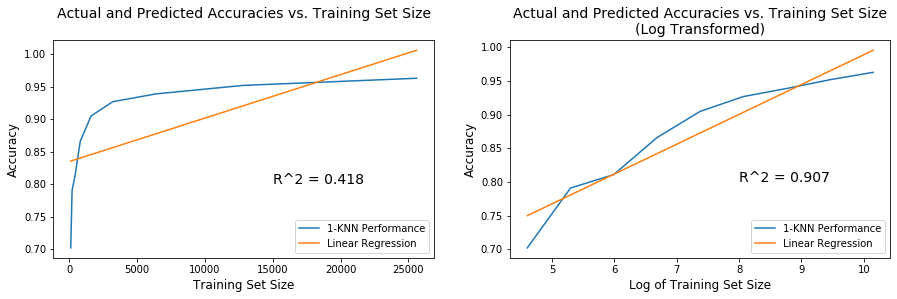

In [6]:
def P4():

    #make training sizes input into array
    train_sizes_array = np.array(train_sizes).reshape(-1,1)
    
    #fit linear regression model, predict values from X
    linreg = LinearRegression().fit(train_sizes_array, accuracies)
    pred_values = linreg.predict(train_sizes_array)
    
    #figure dimensions
    plt.figure(figsize =(15,4))
    
    #plot linear regression
    plt.subplot(1,2,1)
    plt.title('Actual and Predicted Accuracies vs. Training Set Size\n', fontsize=14, fontdict=None, loc='center', pad=None,)
    plt.plot(train_sizes_array,accuracies, label = '1-KNN Performance') #label for legend
    plt.plot(train_sizes_array,pred_values, label = 'Linear Regression') #label for legend
    plt.xlabel('Training Set Size', fontsize = 12)
    plt.ylabel('Accuracy',fontsize = 12)
    plt.legend(loc = 4) #place legend in bottom right corner
    #add text for R^2 on plot
    plt.text(15000, 0.80, "R^2 = {0:.3f}".format( linreg.score(train_sizes_array,accuracies)), fontsize = 14)


    #Transform train_size log transformation
    import math #to use log funciton
    vec_log = np.vectorize(math.log) #create log function to use over array
    log_train_sizes = vec_log(train_sizes_array) #take log of each training set size
    
    #fit linear regression model to log(X), predict values from log(X)
    log_linreg = LinearRegression().fit(log_train_sizes, accuracies)
    log_pred_values = log_linreg.predict(log_train_sizes)
    
    #plot linear regression
    plt.subplot(1,2,2)
    plt.title('Actual and Predicted Accuracies vs. Training Set Size\n(Log Transformed)', fontsize=14, fontdict=None, loc='center', pad=None,)
    plt.plot(log_train_sizes,accuracies, label = '1-KNN Performance') #label for legend
    plt.plot(log_train_sizes,log_pred_values, label = 'Linear Regression') #label for legend
    plt.xlabel('Log of Training Set Size', fontsize = 12)
    plt.ylabel('Accuracy',fontsize = 12)
    plt.legend(loc = 4) #place legend in bottom right corner
    #add text for R^2 on plot
    plt.text(8, 0.80, "R^2 = {0:.3f}".format( log_linreg.score(log_train_sizes,accuracies)), fontsize = 14)
    

P4()

ANSWER: The relationship between the KNN accuracy and training set size appears logarithmic, so it is inappropriate to use a linear regression in this case.

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

       pred0  pred1  pred2  pred3  pred4  pred5  pred6  pred7  pred8  pred9
lab 0    101      0      1      0      0      0      1      1      2      0
lab 1      0    116      1      0      0      0      0      0      1      0
lab 2      1      4     84      2      2      0      2      4      6      1
lab 3      0      2      0     84      0      6      0      2      3      0
lab 4      0      0      1      0     78      0      0      2      0     11
lab 5      2      0      0      1      1     77      5      0      2      0
lab 6      1      2      1      0      1      2     94      0      1      0
lab 7      0      1      1      0      0      0      0     96      0      4
lab 8      1      5      4      3      1      3      0      1     72      4
lab 9      0      1      0      0      3      2      0      7      0     82

 
 The digit 4 was confused with the digit 9 the most. (11 times)


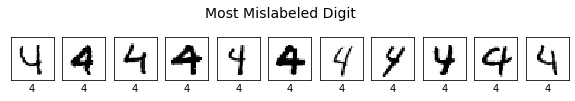

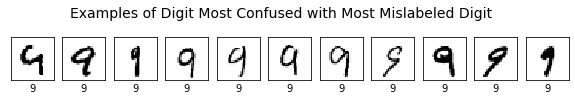

In [7]:
import pandas as pd

def P5():

#change to dev data

    #choose model (1-NN), fit model, predict
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(mini_train_data, mini_train_labels)
    pred_labels = model.predict(dev_data)
    
    #label confusion matrix entries for easier reading
    #create confusion matrix and store in dataframe
    row_lab = ['lab 0','lab 1','lab 2','lab 3','lab 4','lab 5','lab 6','lab 7','lab 8','lab 9']
    col_lab = ['pred0','pred1','pred2','pred3','pred4','pred5','pred6','pred7','pred8','pred9']
    oneNN_cm = confusion_matrix(dev_labels, pred_labels)
    oneNN_cm_df = pd.DataFrame(oneNN_cm, index=row_lab, columns=col_lab)
    print(oneNN_cm_df) 
    
    #find most confused digits and print
    confused_n_times = 0 #initialize
    for i in range(10): #loop through each row
        errors = oneNN_cm[i].tolist() #convert array to list
        del errors[i] #throw out value for correct predictions
        if max(errors) > confused_n_times: 
            confused_n_times = max(errors) #store largest error
            most_confused = i #note which digit was most confused
            most_confused_with = np.where(oneNN_cm[i] == max(errors))[0][0] #predicted digit the true digit is erroneously predicted to be
    print("\n \n", "The digit {a} was confused with the digit {b} the most. ({c} times)".format(a=most_confused, b=most_confused_with, c= confused_n_times))
    
    
    
    #now we mill display images of the most often confused digits
    
    #worst_preds_id stores indexes of most commonly confused digit
    worst_preds_id = np.where((dev_labels != pred_labels) & (dev_labels == str(most_confused)) & (pred_labels == str(most_confused_with)))[0]
    worst_labels = dev_labels[worst_preds_id] #select labels of the most mislabeled digit
    worst_data = dev_data[worst_preds_id] #select images of the most mislabeled digit
    
    #gather examples of digits that the classifier mistakes our confused digit for
    confused_examples_data = dev_data[np.where(dev_labels == str(most_confused_with))[0]]
    confused_examples_labels = dev_labels[np.where(dev_labels == str(most_confused_with))[0]]
    
    #display images of our most confused digit
    fig1 = plt.figure(figsize=(10,1.5)) 
    fig1.suptitle("Most Mislabeled Digit", fontsize = 14) #global title for our subplots
    for i in range(0,len(worst_data)): #loop over number of times we mislabeled most confused digit
        plt.subplot(1,len(worst_data),i+1) #make a subplot for each digit
        plt.xticks([]) #disable x axis ticks.
        plt.yticks([]) #disable y axis ticks.
        plt.grid(False) #disable gridlines.
        #select the image of the first matching digit using index from label training set
        #1D array reshaped into 28x28 grid, colormap change to grayscale
        plt.imshow(np.array(worst_data[i]).reshape(28,28), cmap='Greys')
        plt.xlabel(worst_labels[i]) #print correct label underneath each subplot
    
    #display images of examples of digit classifier got confused with
    fig2 = plt.figure(figsize = (10,1.5))
    fig2.suptitle("Examples of Digit Most Confused with Most Mislabeled Digit", fontsize = 14)
    for i in range(0,len(worst_data)): #only select as many examples as there are mislabeled digits
        plt.subplot(1,len(worst_data),i+1)
        plt.xticks([]) #disable x axis ticks.
        plt.yticks([]) #disable y axis ticks.
        plt.grid(False) #disable gridlines.
        #select the image of the first matching digit using index from label training set
        #1D array reshaped into 28x28 grid, colormap change to grayscale
        plt.imshow(np.array(confused_examples_data[i]).reshape(28,28), cmap='Greys')
        plt.xlabel(confused_examples_labels[i]) #print correct label underneath each sublot
        
        #show plot
    plt.show()
        


P5()

ANSWER: The model confused the digit 4 with the digit 9 most often. This happened 11 times.

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Apply your blur filter in 3 ways:
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracy resulting no filter and from each way you apply the filter.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [16]:
def P6():
    
    def gaussian(x, mu, sig): #I'm lazy; taken from https://stackoverflow.com/questions/14873203/plotting-of-1-dimensional-gaussian-distribution-function
        return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
    
    
    #choosing weights for values based on distance from pixel.
    #I tried a handful of different values chosen by feel
    #for example, [.5,1,1.5,2.0] and [1,1.5,1.75,2.0] and [1, 2, 2.3, 3.0]
    #This is one of the better forming sets I tried
    x_distance = [1, 1.75, 2.25, 2.75]
    
    
    weight = [1] #weight for center pixel
    for d in x_distance:
        weight.append(gaussian(d, 0, 1))
        
    weightsum = sum(weight) #used for normalizing after summing
    
    def easy_blur(data):
        blurred = []
        
        for row in range(0,len(data)): #loop over every digit in data
            newrow = [] #initialize the blurred digit
            
            for pixel in range(4,len(data[row]) - 4): #ignoring the first and last 4 pixels
                newpixel = (
                    weight[4] * data[row][pixel - 4] + 
                    weight[3] * data[row][pixel - 3] + 
                    weight[2] * data[row][pixel - 2] + 
                    weight[1] * data[row][pixel - 1] + 
                    weight[0] * data[row][pixel] + 
                    weight[1] * data[row][pixel + 1] + 
                    weight[2] * data[row][pixel + 2] + 
                    weight[3] * data[row][pixel + 3] + 
                    weight[4] * data[row][pixel + 4]
                )/weightsum
                newrow.append(newpixel) #add the blurred pixel to current row/digit
                
            newrow.insert(0, data[row][0]) #re-insert the first and last 4 pixels before moving onto the next row/digit
            newrow.insert(0, data[row][1])
            newrow.insert(0, data[row][2])
            newrow.insert(0, data[row][3])
            newrow.append(data[row][-4])
            newrow.append(data[row][-3])
            newrow.append(data[row][-2])
            newrow.append(data[row][-1])
                
            blurred.append(newrow) #add our completed row/digit to our new dataset
        
        return np.array(blurred) #return in numpy array for use in built-in classifier
    
    #print(easy_blur(mini_train_data).shape) verify our shenanigans worked
    #Blur Training Data
    #BT = Blur Training data
    #BD = Blur Dev data
    #BTD = Blur Training and Dev data
    
    #blur the data
    blurred_mini_train_data = easy_blur(mini_train_data)
    blurred_dev_data = easy_blur(dev_data)
    
    #choose classifier, fit to (blurred) training data, test using (blurred) dev data
    model = KNeighborsClassifier(n_neighbors=1)
    BT = model.fit(blurred_mini_train_data, mini_train_labels)
    BTpred_labels = BT.predict(dev_data)
    BTreport = classification_report(BTpred_labels, dev_labels, output_dict=True)
    BTaccuracy = BTreport['accuracy']
    print('Blurring the training data but not the development data yields an accuracy of {0}'.format(BTaccuracy))
    
    BD = model.fit(mini_train_data, mini_train_labels)
    BDpred_labels = BD.predict(blurred_dev_data)
    BDreport = classification_report(BDpred_labels, dev_labels, output_dict=True)
    BDaccuracy = BDreport['accuracy']
    print('Blurring the development data but not the training data yields an accuracy of {0}'.format(BDaccuracy))
    
    BTD = model.fit(blurred_mini_train_data, mini_train_labels)
    BTDpred_labels = BTD.predict(blurred_dev_data)
    BTDreport = classification_report(BTDpred_labels, dev_labels, output_dict=True)
    BTDaccuracy = BTDreport['accuracy']
    print('Blurring both the training data and development data yields an accuracy of {0}'.format(BTDaccuracy))

    #no blurring comparison:
    model = KNeighborsClassifier(n_neighbors=1)
    noblur = model.fit(mini_train_data, mini_train_labels)
    NBpred_labels = noblur.predict(dev_data)
    NBreport = classification_report(NBpred_labels, dev_labels, output_dict=True)
    NBaccuracy = NBreport['accuracy']
    print('For comparison, not blurring any data yields an accuracy of {0}'.format(NBaccuracy))
    

P6()

Blurring the training data but not the development data yields an accuracy of 0.814
Blurring the development data but not the training data yields an accuracy of 0.889
Blurring both the training data and development data yields an accuracy of 0.896
For comparison, not blurring any data yields an accuracy of 0.884


In [27]:
   
def gaussian(x, mu, sig): #I'm lazy; taken from https://stackoverflow.com/questions/14873203/plotting-of-1-dimensional-gaussian-distribution-function
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


#choosing weights for values based on distance from pixel.
#I tried a handful of different values chosen by feel
#for example, [.5,1,1.5,2.0] and [1,1.5,1.75,2.0] and [1, 2, 2.3, 3.0]
#This is one of the better forming sets I tried
x_distance = [1, 1.75, 2.25, 2.75]


weight = [1] #weight for center pixel
for d in x_distance:
    weight.append(gaussian(d, 0, 1))

weightsum = sum(weight) #used for normalizing after summing

def easy_blur(data):
    blurred = []

    for row in range(0,len(data)): #loop over every digit in data
        newrow = [] #initialize the blurred digit

        for pixel in range(4,len(data[row]) - 4): #ignoring the first and last 4 pixels
            newpixel = (
                weight[4] * data[row][pixel - 4] + 
                weight[3] * data[row][pixel - 3] + 
                weight[2] * data[row][pixel - 2] + 
                weight[1] * data[row][pixel - 1] + 
                weight[0] * data[row][pixel] + 
                weight[1] * data[row][pixel + 1] + 
                weight[2] * data[row][pixel + 2] + 
                weight[3] * data[row][pixel + 3] + 
                weight[4] * data[row][pixel + 4]
            )/weightsum
            newrow.append(newpixel) #add the blurred pixel to current row/digit

        newrow.insert(0, data[row][0]) #re-insert the first and last 4 pixels before moving onto the next row/digit
        newrow.insert(0, data[row][1])
        newrow.insert(0, data[row][2])
        newrow.insert(0, data[row][3])
        newrow.append(data[row][-4])
        newrow.append(data[row][-3])
        newrow.append(data[row][-2])
        newrow.append(data[row][-1])

        blurred.append(newrow) #add our completed row/digit to our new dataset

    return np.array(blurred) #return in numpy array for use in built-in classifier

#print(easy_blur(mini_train_data).shape) verify our shenanigans worked
#Blur Training Data
#BT = Blur Training data
#BD = Blur Dev data
#BTD = Blur Training and Dev data

#blur the data
blurred_mini_train_data = easy_blur(mini_train_data)
blurred_dev_data = easy_blur(dev_data)

In [36]:

#pd.set_option('display.max_columns', 999)
#display(pd.DataFrame(blurred_dev_data == dev_data))

#choose classifier, fit to (blurred) training data, test using (blurred) dev data    
model = KNeighborsClassifier(n_neighbors = 1)
BD = model.fit(mini_train_data, mini_train_labels)
BDpred_labels = BD.predict(blurred_dev_data)
BDreport = classification_report(BDpred_labels, dev_labels, output_dict=True)
BDaccuracy = BDreport['accuracy']

model = KNeighborsClassifier(n_neighbors=1)
noblur = model.fit(mini_train_data, mini_train_labels)
NBpred_labels = noblur.predict(dev_data)
NBreport = classification_report(NBpred_labels, dev_labels, output_dict=True)
NBaccuracy = NBreport['accuracy']
print('For comparison, not blurring any data yields an accuracy of {0}'.format(NBaccuracy))

    
print(classification_report(BDpred_labels, dev_labels))
print(classification_report(NBpred_labels, dev_labels,))

print('Blurring the development data but not the training data yields an accuracy of {0}'.format(BDaccuracy))



For comparison, not blurring any data yields an accuracy of 0.884
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       110
           1       0.98      0.93      0.95       125
           2       0.86      0.92      0.89        99
           3       0.91      0.90      0.90        98
           4       0.76      0.90      0.82        78
           5       0.85      0.93      0.89        81
           6       0.93      0.93      0.93       102
           7       0.91      0.90      0.91       103
           8       0.80      0.82      0.81        92
           9       0.89      0.76      0.82       112

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.98      0.89      0.93       131
           2

Cursory experimentation with the weights of neighboring pixels when blurring pixels yielded a 1.2% increase in performance. Not too shabby.

### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter.  Use some reasonable threshold to separate white from black.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data.  Use some reasonable thresholds to separate white from gray from black.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [9]:
def P7():

    #process data for MultinomialNB
    def white_grey_black(data):
        processed = []
        
        for row in range(0,len(data)): #loop over every digit in data
            newrow = [] #initialize the processed digit
            
            for pixel in range(0,len(data[row])): #loop over each pixel in digit
                if data[row][pixel] < 0.3: #set pixel = white
                    newpixel = 0
                elif data[row][pixel] < 0.7: #set pixel = gray
                    newpixel = 1
                else:                       #set pixel = black
                    newpixel = 2
                newrow.append(newpixel) #add the processed pixel to current row/digit
            processed.append(newrow) #add completed row/digit to our new dataset

        return np.array(processed) #return in numpy array for use in built-in classifier
    
    #process data for MultinomialNB
    mn_mini_train_data = white_grey_black(mini_train_data)
    mn_dev_data = white_grey_black(dev_data)
    
    #bernoulliNB
    bernoulli = BernoulliNB(alpha = 1, binarize = 0.3, fit_prior = True)
    bernoulli.fit(mini_train_data, mini_train_labels)
    bernoulli_labels = bernoulli.predict(dev_data)
    bernoulli_report = classification_report(bernoulli_labels, dev_labels, output_dict = True)
    
    #MultinomialNB
    multinomial = MultinomialNB(alpha = 1, fit_prior = True)
    multinomial.fit(mn_mini_train_data, mini_train_labels)
    multinomial_labels = multinomial.predict(mn_dev_data)
    multinomial_report = classification_report(multinomial_labels, dev_labels, output_dict = True)
    
    print('BernoulliNB accuracy: {0} \nMultinomialNB accuracy: {1}'.format(bernoulli_report['accuracy'], multinomial_report['accuracy']))

    
P7()

BernoulliNB accuracy: 0.827 
MultinomialNB accuracy: 0.82


ANSWER: The multinomial version does not improve results. The best settings (that I found through manual trial and error) for classifying pixels as white, grey, or black yielded performance that nearly matched that of BernoulliNB model. Adding a "gray" pixel feature does nothing for us due to the nature of our data, which is in the form of digitized hand-written numbers. Variation in darkness of the pixels results from the way it was written on paper, and the "grayness" does not vary in meaningful ways across digits. On the other hand, the Bernoulli model discards ambiguous pixels and amplifies unambiguous pixels at the edge of lines.

### Part 8:

Search across several values for the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Train on the mini train set.
* Vary alpha and evaulate performance using `GridSearchCV` to cross-validate.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [10]:
from IPython.display import display, HTML #use to display results table nicely

def P8(alphas):

    #GridSearchCV takes in dictionary of values to try.
    #BernoulliNB model using .3 as the cutoff for binarizing to white/black pixels
    smooth_check = GridSearchCV(BernoulliNB(binarize = 0.3), iid = False, cv = 5, param_grid = alphas, n_jobs = -1)
    fit = smooth_check.fit(mini_train_data, mini_train_labels)
    results = pd.DataFrame(smooth_check.cv_results_) #make a df from results
    display(results.iloc[:,[4,11,13]].sort_values(by='rank_test_score')) #display a nice summarizing table for every alpha
    return fit

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print()
print("Best alpha = ", nb.best_params_)

### Extra Stuff -- Testing binarize threshold ###
#smooth_check = GridSearchCV(BernoulliNB(), iid = False, cv = 5, param_grid = bin_cutoff, n_jobs = -1)
#with pd.option_context("display.max_rows", 1000):
#    display(results)

#bin_cutoff = [{'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]},{'binarize': [list(np.arange(0.05,0.95,0.01))][0]}]
#nb = P8(bin_cutoff)

,param_alpha,mean_test_score,rank_test_score
1,0.0001,0.827888,1
2,0.001,0.825866,2
3,0.01,0.825811,3
0,1e-10,0.822825,4
4,0.1,0.820810,5
5,0.5,0.817854,6
7,2,0.816748,7
6,1,0.812768,8
8,10,0.774669,9



Best alpha =  {'alpha': 0.0001}


ANSWER: The best value for alpha was 0.0001. The accuracy when alpha is near 0 (alpha = 1e-10) is 0.823, just half a percentage point less accurate than our best alpha. The top 4 out of 9 of our alphas were all 0.1 or smaller. This makes sense -- in the case of our data, Laplace smoothing reduces the contrast between white and black pixels ("diluting" the darkness of the black pixels), making it harder to "see" each digit, especially at its boundaries.

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [11]:
def P9():

    #Use unmodified GNB to classify dev data
    standard_GNB = GaussianNB()
    s_fit = standard_GNB.fit(mini_train_data, mini_train_labels)
    sGNB_pred_values= standard_GNB.predict(dev_data)
    sGNB_report = classification_report(sGNB_pred_values, dev_labels, output_dict=True)
    
    #print accuracy and also largest feature sigma estimated by the model
    print("\nStandard GaussianNB accuracy: ", sGNB_report['accuracy'])
    print('Max sigma in standard GNB model features:', pd.DataFrame(s_fit.sigma_).max().max().round(3))
    
    #Try to fix with sigma_ parameter -- set 
    fixed_GNB = GaussianNB()
    f_fit = fixed_GNB.fit(mini_train_data, mini_train_labels)
    
    #tried a few values for sigma_
    #values between 0 and 10 resulted in similar accuracy
    #0.01 is about the value that var_smoothing adds to each sigma_ in the following model(line28)
    f_fit.sigma_ = np.tile(np.repeat([0.01],784), (10, 1)) 
    fGNB_pred_values= fixed_GNB.predict(dev_data)
    fGNB_report = classification_report(fGNB_pred_values, dev_labels, output_dict=True)
    
    print("\nGaussianNB accuracy with all feature sigmas set to 0.01: ", fGNB_report['accuracy'])
    print('Max sigma:', pd.DataFrame(f_fit.sigma_).max().max(), '(all sigmas are this value)')
    
    #fix with var_smoothing
    fixed_GNB = GaussianNB(var_smoothing = 0.05)
    f_fit = fixed_GNB.fit(mini_train_data, mini_train_labels)
    fGNB_pred_values= fixed_GNB.predict(dev_data)
    fGNB_report = classification_report(fGNB_pred_values, dev_labels, output_dict=True)
    print("\nGaussianNB accuracy with var_smoothing = 0.05: ", fGNB_report['accuracy'])
    
    print('Max sigma for GNB features with var_smoothing = 0.05:', pd.DataFrame(f_fit.sigma_).max().max().round(3))

    #bernoulliNB, for reference
    bernoulli = BernoulliNB(alpha = .01, binarize = 0.3, fit_prior = True)
    bernoulli.fit(mini_train_data, mini_train_labels)
    bernoulli_labels = bernoulli.predict(dev_data)
    bernoulli_report = classification_report(bernoulli_labels, dev_labels, output_dict = True)
    print('\nFor reference, best BernoulliNB accuracy so far in this project is', bernoulli_report['accuracy'])
    print('(alpha = 0.01 and binarize threshold = 0.3)')


P9()


Standard GaussianNB accuracy:  0.593
Max sigma in standard GNB model features: 0.212

GaussianNB accuracy with all feature sigmas set to 0.01:  0.804
Max sigma: 0.01 (all sigmas are this value)

GaussianNB accuracy with var_smoothing = 0.05:  0.816
Max sigma for GNB features with var_smoothing = 0.05: 0.222

For reference, best BernoulliNB accuracy so far in this project is 0.839
(alpha = 0.01 and binarize threshold = 0.3)


ANSWER: Gaussian Naive Bayes estimates a normal probability distribution for each feature/pixel in the data (treating each feature data point as a random sample from this distribution) because it is meant to be used for data with continuous features assumed to have a normal distribution. Adding a small fraction to the estimated variance of each pixel or just replacing the estimated variance with some fraction yielded a much better accuracy that was almost as good as that of our best tested Bernoulli Naive Bayes model. One way in which the model-estimated variances reduce the accuracy of the model is that pixels/features that are rather uniform across the data (e.g. space that was often white) have extremely small variances, resulting in heavy weighting of a feature when it varies from the average.

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

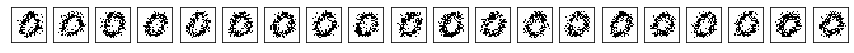

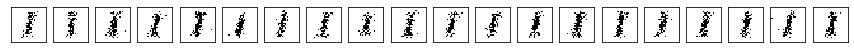

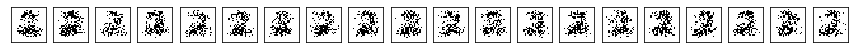

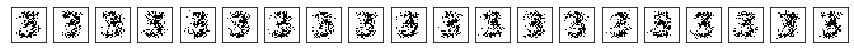

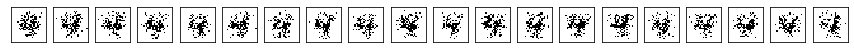

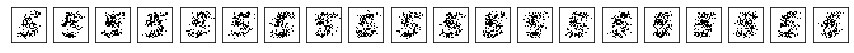

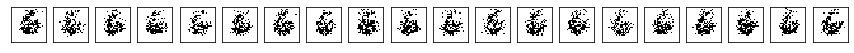

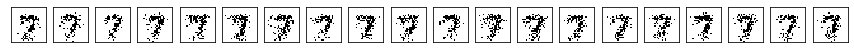

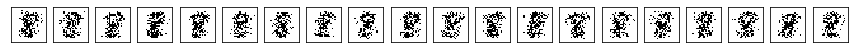

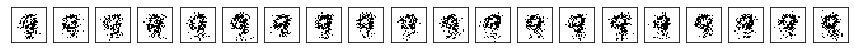

In [12]:
def P10(num_examples):

    #generate model with best alpha we calculated
    bern = BernoulliNB(alpha = .0001, binarize = 0.3, fit_prior = True)
    bern.fit(mini_train_data, mini_train_labels)
    bern_labels = bern.predict(dev_data)
    
    #take feature_log_prob_ and store as DF
    bern_probs = np.exp(bern.feature_log_prob_)
        
    #Let's generate images
    #Set the rng seed to keep it consistent. Not strictly necessary here but oh well.
    np.random.seed(seed=420) #h a h a 420 == f u n n y
    
    #loop from digit 0 to 9
    for k in range(10):
        
        #create plot -- 15 inches x 10 inches
        plt.figure(figsize=(15,10)) 
        
        #loop over number of desired examples
        for i in range(num_examples):
            randoms = np.random.rand(1,784)
            new_image = (randoms <= bern_probs[k]).astype(np.int)
            
            plt.subplot(10,num_examples,i+1) #make a subplot for each digit
            plt.xticks([]) #disable x axis ticks.
            plt.yticks([]) #disable y axis ticks.
            plt.grid(False) #disable gridlines.
            #1D array reshaped into 28x28 grid, colormap change to grayscale
            plt.imshow(new_image.reshape(28,28), cmap='Greys')
            #plt.xlabel(str(k)) #print correct label underneath each sublot
        
        #show plot
        plt.show()
        

P10(20)

ANSWER: The general shape of the generated digits look like that of the training digit images, but the collection of pixels in each generated digit is much more spread out than the thickest hand-drawn line of the training digits. There is less variation among the generated digits than among the training data digits, since the generated digits are basically modeled after the "average" of all the training digits. Some digits, particularly the number 4, are not well-defined due to the higher variation in those handwritten digits relative to more uniformly-written digits, like the number 1.

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Train on the mini train set.
* Evaluate perfromance on the dev set.
* Apply a reasonable Laplace smoothing (alpha) value.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [13]:
def P11(buckets, correct, total):
    
    #define our classifier, predict from dev_data
    #store posteriors
    bern = BernoulliNB(alpha = .01, binarize = 0.3, fit_prior = True)
    bern.fit(mini_train_data, mini_train_labels)
    pred_labels = bern.predict(dev_data)
    correct_preds = (pred_labels == dev_labels).astype(np.int)
    posteriors = bern.predict_proba(dev_data)
    
    #loop through 1000 posteriors
    for n in range(len(posteriors)):
        
        #choose the label the classifier thinks is most likely for the digit
        max_post = max(posteriors[n])
        
        #check which bucket the posterior fits in
        for i in range(len(buckets)-1):
            
            if ((max_post >= buckets[i]) and (max_post <buckets[i+1])):
                total[i] +=1

                if correct_preds[n] == 1:
                    correct[i] +=1                
    
    #customized the included printing code
    for i in range(len(buckets)-1):
        accuracy = 0.0
        if (total[i] > 0): accuracy = correct[i] / total[i]
        print('Posterior probability between {0:<15} and {1:<15}, total = {2}   accuracy = {3:.4f}'.format(buckets[i], buckets[i+1], total[i],accuracy))
        
    overall_accuracy = classification_report(pred_labels, dev_labels, output_dict=True)['accuracy']
    
    #include overall accuracy for reference
    print('Overall accuracy = ', overall_accuracy)
    

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

Posterior probability between 0.5             and 0.9            , total = 30   accuracy = 0.4667
Posterior probability between 0.9             and 0.999          , total = 81   accuracy = 0.5062
Posterior probability between 0.999           and 0.99999        , total = 63   accuracy = 0.5873
Posterior probability between 0.99999         and 0.9999999      , total = 71   accuracy = 0.6338
Posterior probability between 0.9999999       and 0.999999999    , total = 50   accuracy = 0.8800
Posterior probability between 0.999999999     and 0.99999999999  , total = 62   accuracy = 0.8226
Posterior probability between 0.99999999999   and 0.9999999999999, total = 55   accuracy = 0.8364
Posterior probability between 0.9999999999999 and 1.0            , total = 30   accuracy = 0.8333
Overall accuracy =  0.839


ANSWER: I would characterize the calibration as very weakly calibrated. There appears to be some positive correlation between posterior probability and accuracy as the probability approaches 1.0; however, accuracy peaks and then decreases by the last 3 buckets approaching 1.0. Interestingly, changing the Laplace smoothing factor to larger values (between 0.01 and 1) improves the apparent calibration of our classifier but decreases the overall accuracy.